# 머신러닝 프로젝트 
### Airbnb (New York City)
미국 NYC Airbnb 목록(2019)
프로젝트 목적: 가격 예측(price)
제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)
<참고> : 6. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝에서 복습하실 수 있습니다.
데이터 출처 바로가기 / License CC0: Public Domain

1. Baseline

In [3]:
# 라이브러리 
import pandas as pd

In [16]:
# 데이터 불러오기
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

2. EDA(탐색적 데이터 분석)

In [17]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [6]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [7]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [18]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [19]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

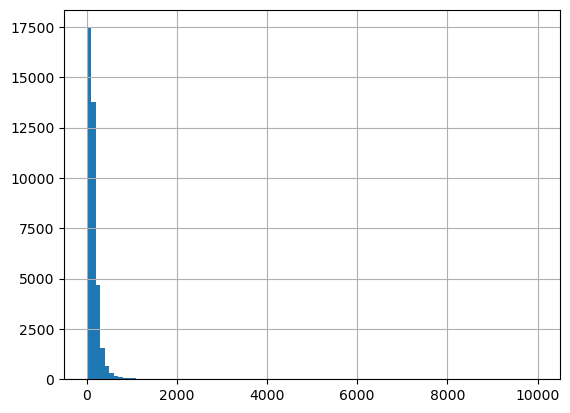

In [20]:
# target(hist)
train['price'].hist(bins=100)

In [37]:
#데이터 전처리 
#로그치환
import numpy as np
print(train['price'][:3])
print(np.loglp(train['price'])[:3])
print(np.expml(np.loglp(train['price'])[:3]))

KeyError: 'price'

In [21]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [22]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

3. 데이터 전처리
- 데이터를 살펴보고 판단하여 결측치 및 이상치를 처리

In [23]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [24]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [25]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [26]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [27]:
# 수치형 피처 선택
cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

train = train[cols]
test = test[cols]

4. 검증 데이터 분리
- Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측

In [28]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

5. 머신러닝


In [29]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

32000.462372605256

In [30]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

c:\Users\ze-ro\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.06762e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


32002.92136582541

In [31]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

32695.6062162849

In [32]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

33521.06875602843

In [33]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

31446.66249631902

In [34]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

31838.531510528188

6. 채점


In [35]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('data\y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

51046.25646764309